<a href="https://colab.research.google.com/github/Sarik123-long/Data-Analytics-with_Oasis_Infobyte/blob/main/Project8_Unveiling_the_Android_App_Market_Analyzing_Google_Play_Store_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=filename, length=len(uploaded[filename])))

Saving archive (45).zip to archive (45).zip
User uploaded file "archive (45).zip" with length 2038565 bytes


In [2]:
import zipfile

zip_file_path = 'archive (45).zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

In [4]:
df = pd.read_csv('datasets/apps.csv')
display(df.head())

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
display(df.info())
display(df.isnull().sum())
display(df['Reviews'].head())
display(df['Installs'].head())
display(df['Size'].head())
display(df['Price'].head())
display(df['Reviews'].unique())
display(df['Installs'].unique())
display(df['Size'].unique())
display(df['Price'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


None

,0
Unnamed: 0,0
App,0
Category,0
Rating,1463
Reviews,0
Size,1227
Installs,0
Type,0
Price,0
Content Rating,0


,Reviews
0,159
1,967
2,87510
3,215644
4,967


,Installs
0,"10,000+"
1,"500,000+"
2,"5,000,000+"
3,"50,000,000+"
4,"100,000+"


,Size
0,19.0
1,14.0
2,8.7
3,25.0
4,2.8


,Price
0,0
1,0
2,0
3,0
4,0


array([   159,    967,  87510, ...,    603,   1195, 398307])

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

array([ 19. ,  14. ,   8.7,  25. ,   2.8,   5.6,  29. ,  33. ,   3.1,
        28. ,  12. ,  20. ,  21. ,  37. ,   2.7,   5.5,  17. ,  39. ,
        31. ,   4.2,   7. ,  23. ,   6. ,   6.1,   4.6,   9.2,   5.2,
        11. ,  24. ,   nan,   9.4,  15. ,  10. ,   1.2,  26. ,   8. ,
         7.9,  56. ,  57. ,  35. ,  54. ,   0.2,   3.6,   5.7,   8.6,
         2.4,  27. ,   2.5,  16. ,   3.4,   8.9,   3.9,   2.9,  38. ,
        32. ,   5.4,  18. ,   1.1,   2.2,   4.5,   9.8,  52. ,   9. ,
         6.7,  30. ,   2.6,   7.1,   3.7,  22. ,   7.4,   6.4,   3.2,
         8.2,   9.9,   4.9,   9.5,   5. ,   5.9,  13. ,  73. ,   6.8,
         3.5,   4. ,   2.3,   7.2,   2.1,  42. ,   7.3,   9.1,  55. ,
         0. ,   6.5,   1.5,   7.5,  51. ,  41. ,  48. ,   8.5,  46. ,
         8.3,   4.3,   4.7,   3.3,  40. ,   7.8,   8.8,   6.6,   5.1,
        61. ,  66. ,   0.1,   8.4,  44. ,   0.7,   1.6,   6.2,  53. ,
         1.4,   3. ,   5.8,   3.8,   9.6,  45. ,  63. ,  49. ,  77. ,
         4.4,   4.8,

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [6]:
df.dropna(subset=['Rating', 'Size'], inplace=True)

df['Reviews'] = pd.to_numeric(df['Reviews'])

df['Installs'] = df['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False)
df['Installs'] = pd.to_numeric(df['Installs'])

df['Price'] = df['Price'].str.replace('$', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'])

# Handle 'Size' column - convert 'M' and 'k' to a consistent unit (MB)
df['Size'] = df['Size'].astype(str).str.replace('M', '', regex=False)
df['Size'] = df['Size'].str.replace('k', 'e-3', regex=False)
df['Size'] = pd.to_numeric(df['Size'])

display(df.info())
display(df.isnull().sum())
display(df[['Reviews', 'Installs', 'Size', 'Price']].head())

<class 'pandas.core.frame.DataFrame'>
Index: 7027 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7027 non-null   int64  
 1   App             7027 non-null   object 
 2   Category        7027 non-null   object 
 3   Rating          7027 non-null   float64
 4   Reviews         7027 non-null   int64  
 5   Size            7027 non-null   float64
 6   Installs        7027 non-null   int64  
 7   Type            7027 non-null   object 
 8   Price           7027 non-null   float64
 9   Content Rating  7027 non-null   object 
 10  Genres          7027 non-null   object 
 11  Last Updated    7027 non-null   object 
 12  Current Ver     7023 non-null   object 
 13  Android Ver     7025 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 823.5+ KB


None

,0
Unnamed: 0,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0


,Reviews,Installs,Size,Price
0,159,10000,19.0,0.0
1,967,500000,14.0,0.0
2,87510,5000000,8.7,0.0
3,215644,50000000,25.0,0.0
4,967,100000,2.8,0.0


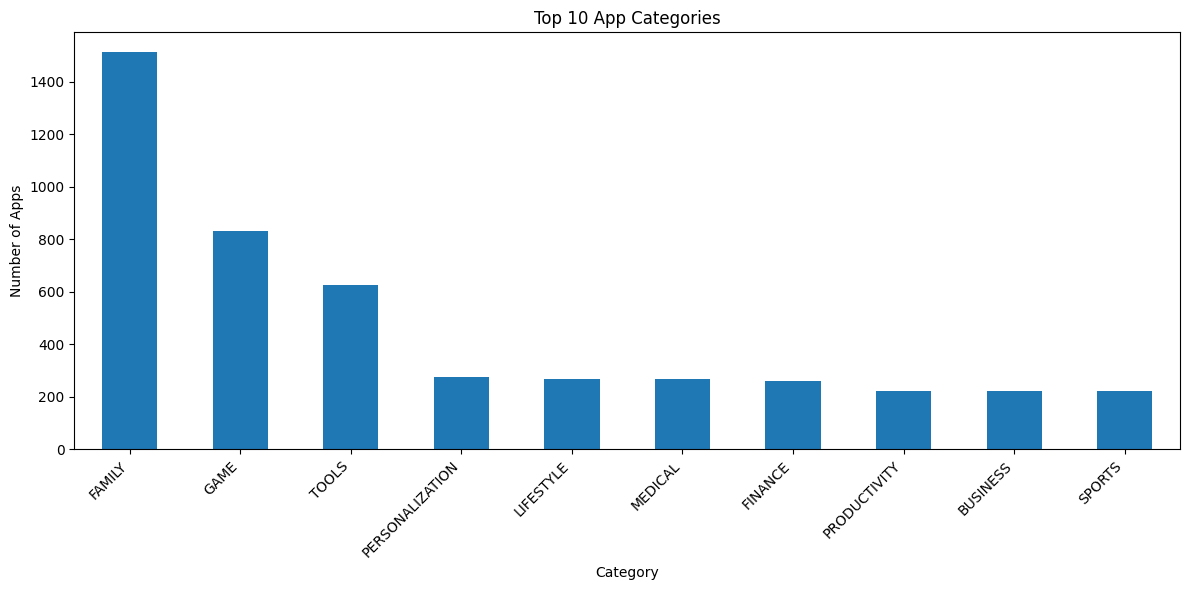

In [7]:
import matplotlib.pyplot as plt

category_counts = df['Category'].value_counts()

top_10_categories = category_counts.head(10)

plt.figure(figsize=(12, 6))
top_10_categories.plot(kind='bar')
plt.title('Top 10 App Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

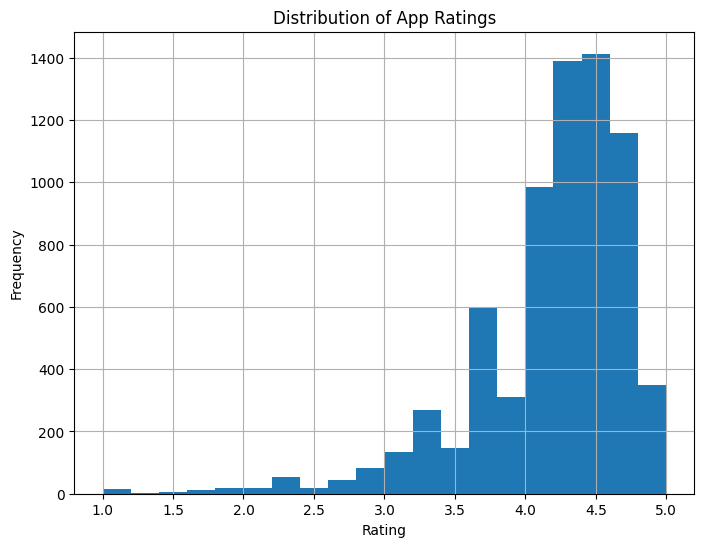

,Rating
count,7027.000000
mean,4.160623
std,0.559145
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


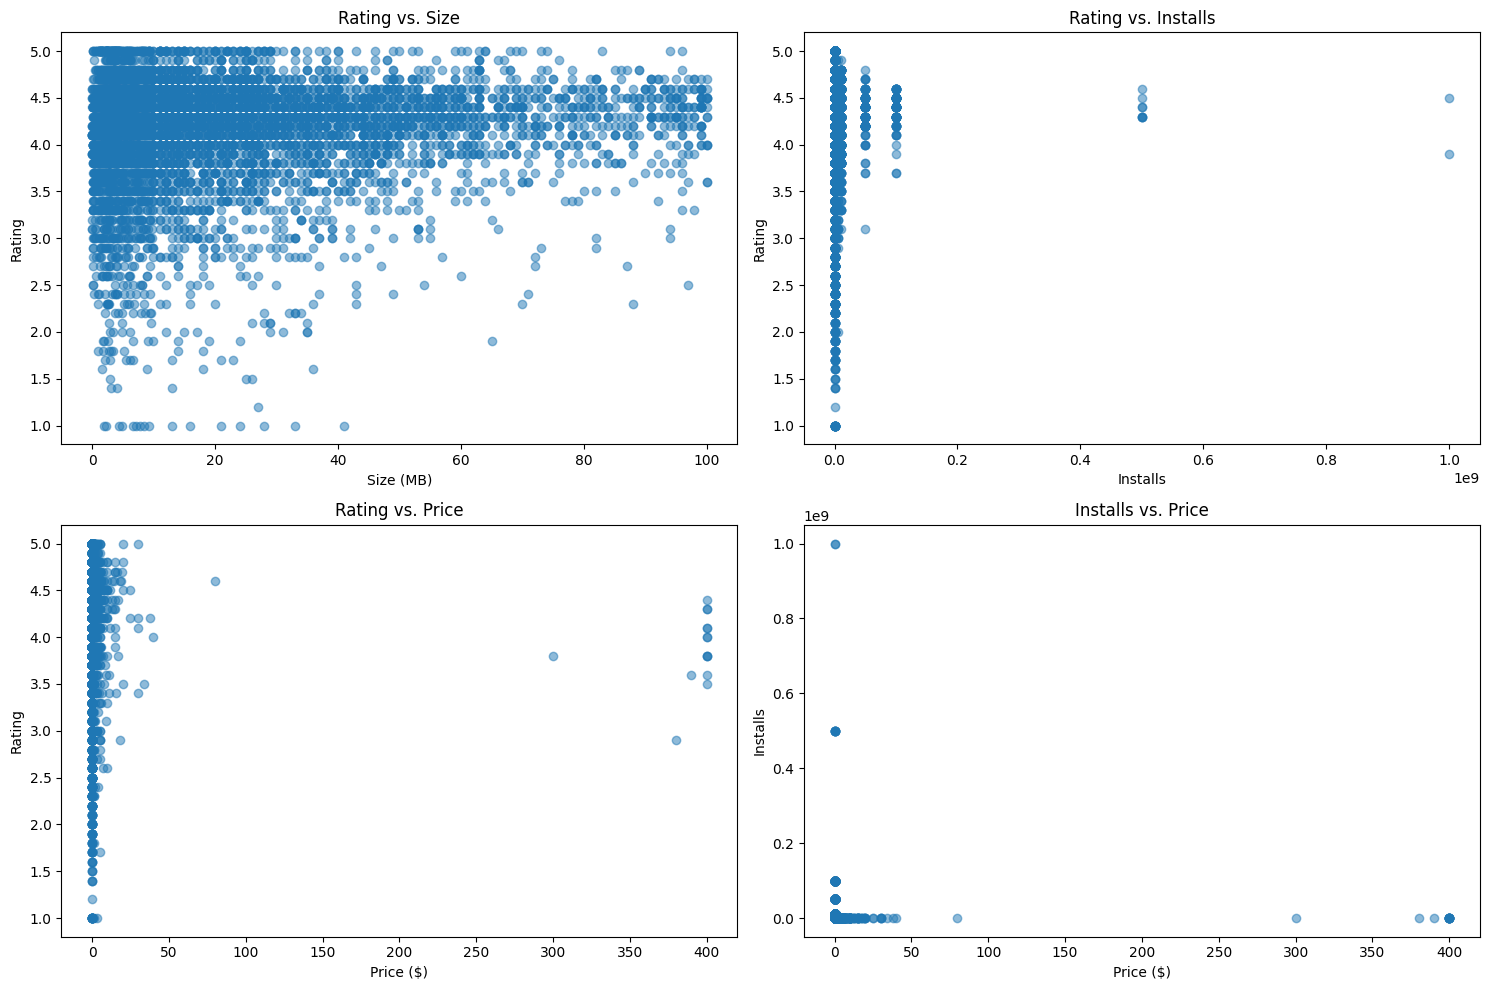

,Rating,Size,Installs,Price
Rating,1.000000,0.063076,0.047610,-0.021140
Size,0.063076,1.000000,0.131766,-0.025698
Installs,0.047610,0.131766,1.000000,-0.010562
Price,-0.021140,-0.025698,-0.010562,1.000000


Summary of Observed Relationships and Trends:
- The distribution of ratings appears to be skewed towards higher ratings, with a peak around 4.0 to 4.5.
- There is no strong linear relationship observed between Rating and Size from the scatter plot.
- There seems to be a slight positive correlation between Rating and Installs, but it's not very strong.
- There is no clear relationship between Rating and Price; most apps are free.
- There is a weak negative correlation between Installs and Price, suggesting free apps tend to have more installs.
- The correlation matrix confirms these observations: weak positive correlation between Rating and Installs, weak negative correlation between Installs and Price, and very weak correlations with Size and Price regarding Rating.


In [8]:
# 1. Analyze the distribution of the 'Rating' column
plt.figure(figsize=(8, 6))
df['Rating'].hist(bins=20)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

display(df['Rating'].describe())

# 2. Create scatter plots
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(df['Size'], df['Rating'], alpha=0.5)
plt.title('Rating vs. Size')
plt.xlabel('Size (MB)')
plt.ylabel('Rating')

plt.subplot(2, 2, 2)
plt.scatter(df['Installs'], df['Rating'], alpha=0.5)
plt.title('Rating vs. Installs')
plt.xlabel('Installs')
plt.ylabel('Rating')

plt.subplot(2, 2, 3)
plt.scatter(df['Price'], df['Rating'], alpha=0.5)
plt.title('Rating vs. Price')
plt.xlabel('Price ($)')
plt.ylabel('Rating')

plt.subplot(2, 2, 4)
plt.scatter(df['Price'], df['Installs'], alpha=0.5)
plt.title('Installs vs. Price')
plt.xlabel('Price ($)')
plt.ylabel('Installs')

plt.tight_layout()
plt.show()

# 3. Calculate and display the correlation matrix
correlation_matrix = df[['Rating', 'Size', 'Installs', 'Price']].corr()
display(correlation_matrix)

# 4. Summarize the observed relationships and trends.
print("Summary of Observed Relationships and Trends:")
print("- The distribution of ratings appears to be skewed towards higher ratings, with a peak around 4.0 to 4.5.")
print("- There is no strong linear relationship observed between Rating and Size from the scatter plot.")
print("- There seems to be a slight positive correlation between Rating and Installs, but it's not very strong.")
print("- There is no clear relationship between Rating and Price; most apps are free.")
print("- There is a weak negative correlation between Installs and Price, suggesting free apps tend to have more installs.")
print("- The correlation matrix confirms these observations: weak positive correlation between Rating and Installs, weak negative correlation between Installs and Price, and very weak correlations with Size and Price regarding Rating.")

In [9]:
import os

# Check if 'datasets' directory exists and list its contents
if os.path.exists('datasets'):
    print("Contents of 'datasets' directory:")
    print(os.listdir('datasets'))
else:
    print("'datasets' directory not found.")

# Check the current directory as well
print("\nContents of current directory:")
print(os.listdir('.'))

Contents of 'datasets' directory:
['apps.csv', 'user_reviews.csv']

Contents of current directory:
['.config', 'archive (45).zip', 'datasets', 'sample_data']


In [10]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load the reviews dataset
try:
    reviews_df = pd.read_csv('datasets/user_reviews.csv')
    print("Reviews dataset loaded successfully.")
    display(reviews_df.head())

    # Check if the reviews DataFrame has a 'Translated_Review' column
    if 'Translated_Review' in reviews_df.columns:
        print("Performing sentiment analysis on 'Translated_Review' column.")

        # Handle missing values in the 'Translated_Review' column before analysis
        reviews_df.dropna(subset=['Translated_Review'], inplace=True)

        # Initialize VADER sentiment analyzer
        analyzer = SentimentIntensityAnalyzer()

        # Function to get sentiment score
        def get_sentiment_score(text):
            return analyzer.polarity_scores(text)['compound']

        # Apply sentiment analysis
        reviews_df['Sentiment_Score'] = reviews_df['Translated_Review'].apply(get_sentiment_score)

        # Classify sentiment based on score
        def classify_sentiment(score):
            if score >= 0.05:
                return 'Positive'
            elif score <= -0.05:
                return 'Negative'
            else:
                return 'Neutral'

        reviews_df['Sentiment'] = reviews_df['Sentiment_Score'].apply(classify_sentiment)

        # Analyze the distribution of sentiment
        sentiment_counts = reviews_df['Sentiment'].value_counts()
        print("\nSentiment Distribution:")
        display(sentiment_counts)

        # Plot the distribution of sentiment scores
        plt.figure(figsize=(10, 6))
        reviews_df['Sentiment_Score'].hist(bins=30)
        plt.title('Distribution of Sentiment Scores')
        plt.xlabel('Sentiment Score')
        plt.ylabel('Frequency')
        plt.show()

        # Plot the distribution of sentiment categories
        plt.figure(figsize=(8, 5))
        sentiment_counts.plot(kind='bar')
        plt.title('Sentiment Distribution of User Reviews')
        plt.xlabel('Sentiment')
        plt.ylabel('Number of Reviews')
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()

    else:
        print("Reviews DataFrame does not contain a 'Translated_Review' column. Cannot perform sentiment analysis.")

except FileNotFoundError:
    print("Reviews dataset file not found.")
except Exception as e:
    print(f"An error occurred: {e}")


Reviews dataset loaded successfully.


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


Performing sentiment analysis on 'Translated_Review' column.
An error occurred: 
**********************************************************************
  Resource vader_lexicon not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('vader_lexicon')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load sentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************



In [11]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

Reviews dataset is already loaded.


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


Performing sentiment analysis on 'Translated_Review' column.

Sentiment Distribution:


,count
Sentiment,
Positive,25526
Negative,7505
Neutral,4396


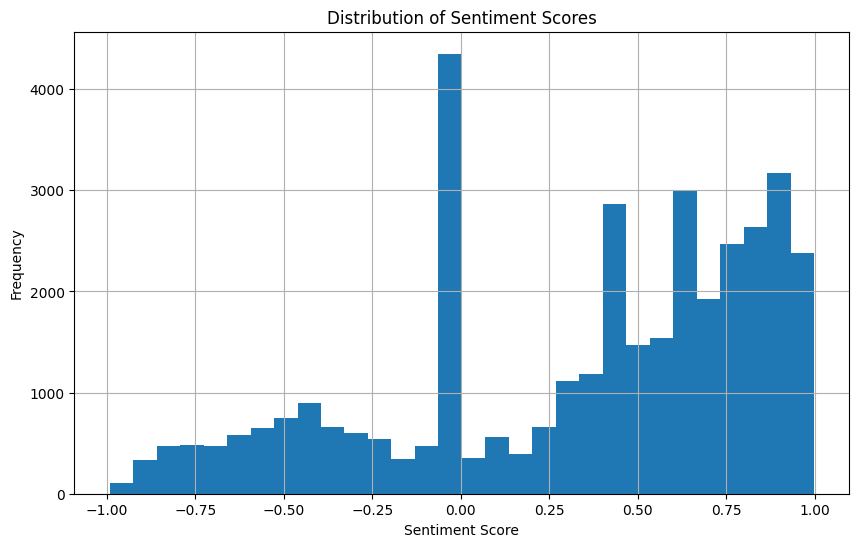

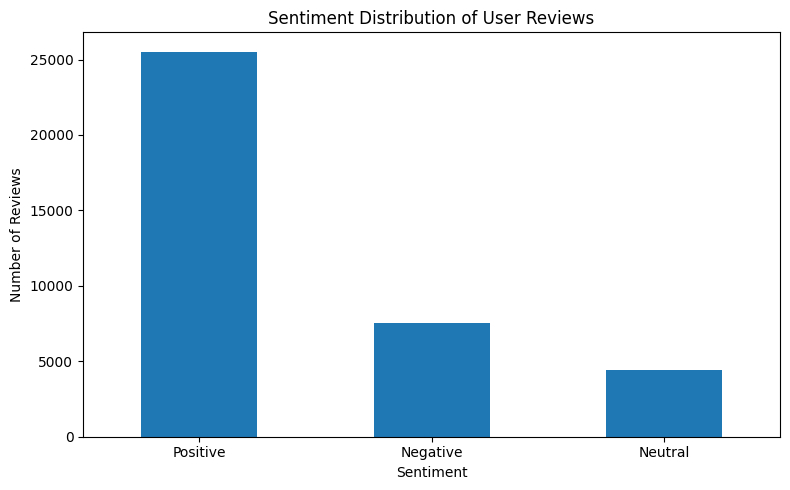

In [12]:
# Load the reviews dataset
try:
    # reviews_df is already loaded from the previous run, so no need to load again
    # reviews_df = pd.read_csv('datasets/user_reviews.csv')
    print("Reviews dataset is already loaded.")
    display(reviews_df.head())

    # Check if the reviews DataFrame has a 'Translated_Review' column
    if 'Translated_Review' in reviews_df.columns:
        print("Performing sentiment analysis on 'Translated_Review' column.")

        # Handle missing values in the 'Translated_Review' column before analysis
        reviews_df.dropna(subset=['Translated_Review'], inplace=True)

        # Initialize VADER sentiment analyzer
        analyzer = SentimentIntensityAnalyzer()

        # Function to get sentiment score
        def get_sentiment_score(text):
            return analyzer.polarity_scores(text)['compound']

        # Apply sentiment analysis
        reviews_df['Sentiment_Score'] = reviews_df['Translated_Review'].apply(get_sentiment_score)

        # Classify sentiment based on score
        def classify_sentiment(score):
            if score >= 0.05:
                return 'Positive'
            elif score <= -0.05:
                return 'Negative'
            else:
                return 'Neutral'

        reviews_df['Sentiment'] = reviews_df['Sentiment_Score'].apply(classify_sentiment)

        # Analyze the distribution of sentiment
        sentiment_counts = reviews_df['Sentiment'].value_counts()
        print("\nSentiment Distribution:")
        display(sentiment_counts)

        # Plot the distribution of sentiment scores
        plt.figure(figsize=(10, 6))
        reviews_df['Sentiment_Score'].hist(bins=30)
        plt.title('Distribution of Sentiment Scores')
        plt.xlabel('Sentiment Score')
        plt.ylabel('Frequency')
        plt.show()

        # Plot the distribution of sentiment categories
        plt.figure(figsize=(8, 5))
        sentiment_counts.plot(kind='bar')
        plt.title('Sentiment Distribution of User Reviews')
        plt.xlabel('Sentiment')
        plt.ylabel('Number of Reviews')
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()

    else:
        print("Reviews DataFrame does not contain a 'Translated_Review' column. Cannot perform sentiment analysis.")

except FileNotFoundError:
    print("Reviews dataset file not found.")
except Exception as e:
    print(f"An error occurred: {e}")

In [13]:
import plotly.express as px

# 2. Interactive Scatter Plot: Rating vs Size
fig_rating_size = px.scatter(df, x='Size', y='Rating',
                             hover_data=['App', 'Category', 'Rating', 'Size'],
                             title='Interactive Scatter Plot: App Rating vs. Size')
fig_rating_size.show()

# 3. Interactive Scatter Plot: Rating vs Installs
fig_rating_installs = px.scatter(df, x='Installs', y='Rating',
                                 hover_data=['App', 'Category', 'Rating', 'Installs'],
                                 title='Interactive Scatter Plot: App Rating vs. Installs')
fig_rating_installs.show()

# 4. Interactive Scatter Plot: Installs vs Price
fig_installs_price = px.scatter(df, x='Price', y='Installs',
                                hover_data=['App', 'Category', 'Installs', 'Price'],
                                title='Interactive Scatter Plot: App Installs vs. Price')
fig_installs_price.show()

# 5. Interactive Bar Chart: Top 10 App Categories
# The top_10_categories is a pandas Series, convert it to a DataFrame for plotly
top_10_categories_df = top_10_categories.reset_index()
top_10_categories_df.columns = ['Category', 'Number of Apps']
fig_top_categories = px.bar(top_10_categories_df, x='Category', y='Number of Apps',
                            title='Interactive Bar Chart: Top 10 App Categories')
fig_top_categories.show()

# 6. Interactive Histogram: Distribution of App Ratings
fig_rating_hist = px.histogram(df, x='Rating', nbins=20,
                               title='Interactive Histogram: Distribution of App Ratings')
fig_rating_hist.show()